# Customer Segmentation Analysis

In [8]:
# To load and preprocess the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/ASUS/ecommerce_data.csv', encoding='latin1')

# Data Preprocessing
data.dropna(subset=['CustomerID'], inplace=True)  # Remove rows with missing CustomerID
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Convert InvoiceDate to datetime
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']  # Calculate total price per invoice line

# Display the first few rows of the dataset
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [10]:
# to calculate RFM values

In [5]:
import datetime as dt

# Define today's date as the day after the last invoice date
today_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename the columns to Recency, Frequency, and Monetary
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display the first few rows of the RFM table
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          2      0.00
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


In [12]:
# to segment customerws

In [13]:
# Define RFM score segments
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, ['1', '2', '3', '4'])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, ['4', '3', '2', '1'])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, ['4', '3', '2', '1'])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define RFM segment mapping
seg_map = {
    r'[1-2][1-2]': 'Low Value',
    r'[3-4][1-2]': 'Mid Value',
    r'[1-2][3-4]': 'Mid Value',
    r'[3-4][3-4]': 'High Value'
}

# Segment customers based on RFM Score
rfm['Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

# Display the first few rows of the segmented RFM table
print(rfm.head())


            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
CustomerID                                                                   
12346.0         326          2      0.00       4       3       4       434   
12347.0           2          7   4310.00       1       1       1       111   
12348.0          75          4   1797.24       3       2       1       321   
12349.0          19          1   1757.55       2       4       1       241   
12350.0         310          1    334.40       4       4       3       443   

                Segment  
CustomerID               
12346.0     High Value4  
12347.0      Low Value1  
12348.0      3Low Value  
12349.0      2Mid Value  
12350.0     High Value3  


In [14]:
# to visualize the segments

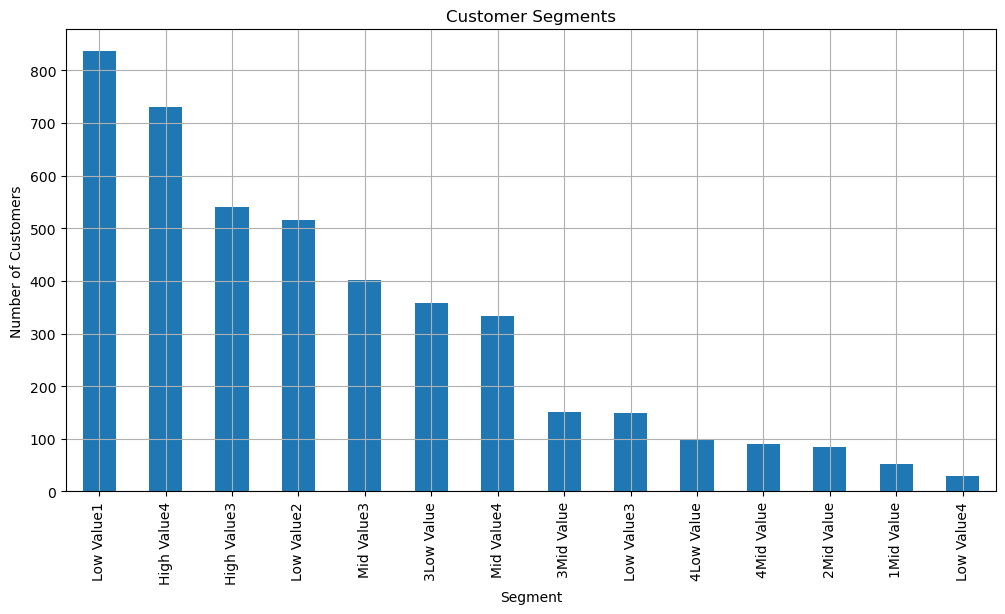

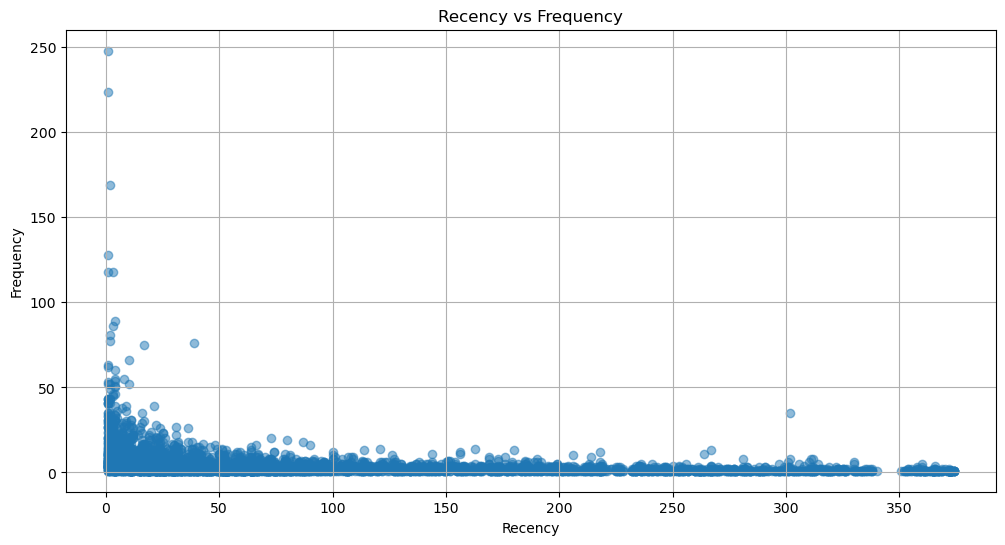

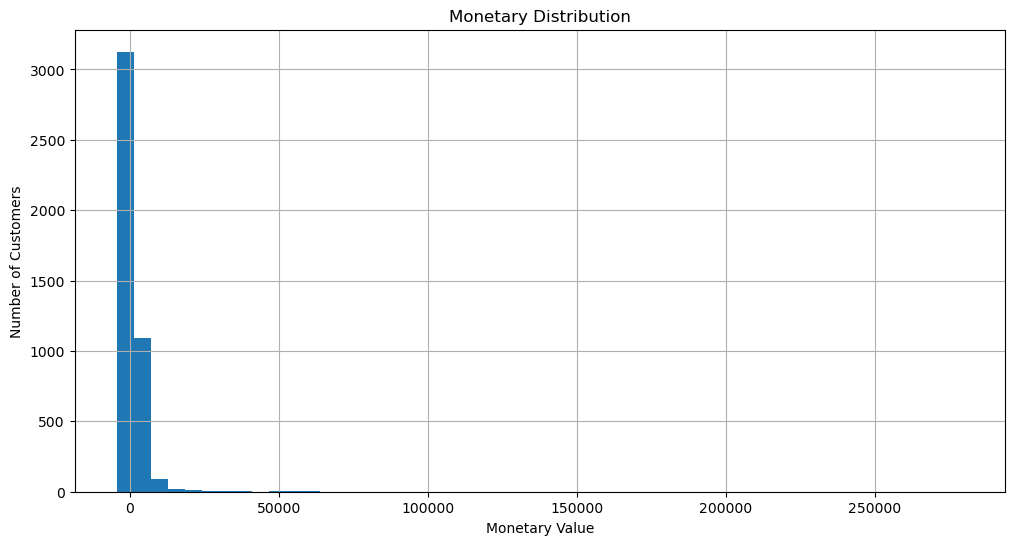

In [15]:
# Visualization: RFM Segmentation
plt.figure(figsize=(12, 6))

# Plot the number of customers in each segment
rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Visualization: Recency vs. Frequency
plt.figure(figsize=(12, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], alpha=0.5)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization: Monetary Distribution
plt.figure(figsize=(12, 6))
rfm['Monetary'].plot(kind='hist', bins=50)
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()
